<a href="https://colab.research.google.com/github/Gilbert9172/CSAI_assignment/blob/main/%5B%EC%A0%95%EA%B8%B8%EC%A4%80%5Dn214.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 4*

# 📝 Assignment
---

# Gender Cardiovascular disease

# 1) 

In [1]:
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/cardio/cardio_train.csv', sep=';').iloc[:,1:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [2]:
# 중복 유무 확인 & 중복 행 제거 & 샘플수
print(set(df.duplicated().tolist()),
      df.drop_duplicates(inplace=True, ignore_index=True),
      df.shape, sep = "\n")

{False, True}
None
(69976, 12)


# 2) 

> [타켓특성 확인](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset?select=cardio_train.csv)

In [3]:
df['cardio'].value_counts(normalize = True)

0    0.500229
1    0.499771
Name: cardio, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split

features = df.columns[:-1]
target = ['cardio']

X_train, X_test, y_train, y_test = train_test_split(df[features],df[target],
                                                    test_size=0.2, random_state=2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.2,random_state=2) 

len(X_val)

11196

# 3) 

In [5]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 모델 log에 할당
log = LogisticRegression(max_iter=1000)

# 모델에 fit (train_set)
log.fit(X_train, y_train)

# 검증 세트의 정확도 
print(log.score(X_val,y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7073061807788495


# 4) 

In [6]:
pip install --upgrade category_encoders

     |████████████████████████████████| 81kB 9.4MB/s 


In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas.util.testing as tm
from sklearn.metrics import accuracy_score
from category_encoders import OneHotEncoder as OHE

# use_cat_names = True : 각 범주명을 특성에 사용
encoding = OHE(cols=['gender'], use_cat_names = True)

# test-set (학습)
X_train_encoded = encoding.fit_transform(X_train)

# val-set  (검정=semi테스트)
X_val_encoded = encoding.transform(X_val)

# 모델에 (encoded train_set) fit 
log.fit(X_train_encoded, y_train)

# 검증 세트의 정확도 
print(log.score(X_val_encoded,y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6944444444444444


# 5)

In [8]:
# 스케일링
from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()
X_train_scaled = scaling.fit_transform(X_train_encoded)
X_val_scaled = scaling.transform(X_val_encoded)

# 모델에 검정_set fit 
log.fit(X_val_scaled,y_val)

# test_set 인코딩 및 표준화
X_test_encoded = encoding.transform(X_test)
X_test_scaled = scaling.transform(X_test_encoded)

y_pred = log.predict(X_test_scaled )
# 테스트세트에서 딱 한 번 정확도를 확인
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7314947127750786

In [9]:
# 평균 & 편차 
X_train_scaled.T[0].mean(), X_train_scaled.T[0].std()

(-1.3390900075507426e-16, 1.0)

In [10]:
# 계수 확인
coefficients = pd.Series(log.coef_[0], X_train_encoded.columns)
coefficients

# 결과 gender1이 심혈관 질환증상 많다.

age            0.358241
gender_1.0     0.009234
gender_2.0    -0.009234
height        -0.028715
weight         0.153065
ap_hi          5.830655
ap_lo          0.008522
cholesterol    0.405508
gluc          -0.076102
smoke         -0.013898
alco          -0.042711
active        -0.094223
dtype: float64

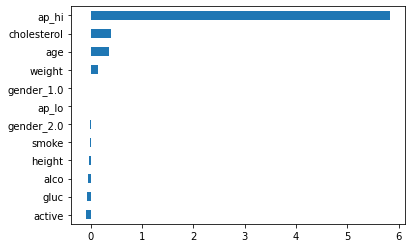

In [11]:
# 시각화
coefficients.sort_values().plot.barh();

- 69976
- 11196
- 0.7073
- 0.694
- 0.73149